In [ ]:
%pylab inline

In [4]:

import numpy as np
 
# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
 
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
 
# output dataset            
y = np.array([[0,0,1,1]]).T
 
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1
 
for iter in xrange(10000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
 
    # how much did we miss?
    l1_error = y - l1
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)
 
    # update weights
    syn0 += np.dot(l0.T,l1_delta)
    #print l1
print "Output After Training:"
print l1
print syn0

Output After Training:
[[ 0.00966449]
 [ 0.00786506]
 [ 0.99358898]
 [ 0.99211957]]
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]


In [30]:
# 三层隐藏层 网络
import numpy as np
 
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
 
    return 1/(1+np.exp(-x))
 
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
 
y = np.array([[0],
            [1],
            [1],
            [0]])
 
np.random.seed(1)
 
# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,6)) - 1
syn2 = 2*np.random.random((6,1)) - 1
 
print 'syn0.shape %d' , syn0.shape
print 'syn1.shape %d' , syn1.shape

print 'X.shape %d' , X.shape

lview = []
for j in xrange(10000):
 
    # Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    l3 = nonlin(np.dot(l2,syn2))
 
    # how much did we miss the target value?
    #l2_error = y - l2
    l3_error = y -  l3
 
    if (j% 50000) == 0:
        #print "Error:" + str(np.mean(np.abs(l2_error)))
        print "Error:" + str(np.mean(np.abs(l3_error)))
        #print 'syn0',syn0
        #print 'syn1',syn1
        
    if(j%100) == 0:
        lview.append(l3_error)
 
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l3_delta = l3_error*nonlin(l3, deriv=True)
    
    l2_error = l3_delta.dot(syn2.T)
    
    l2_delta = l2_error*nonlin(l2,deriv=True)
 
    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
 
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)
 
    syn2 += l2.T.dot(l3_delta)
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    
print l2
print l3

syn0.shape %d (3, 4)
syn1.shape %d (4, 6)
X.shape %d (4, 3)
Error:0.500726417987
[[ 0.15942294  0.28773401  0.82115729  0.14037827  0.12895973  0.80746259]
 [ 0.3418398   0.49746304  0.38685176  0.58094544  0.81443627  0.34744373]
 [ 0.08686772  0.45622974  0.23009033  0.62721761  0.79123719  0.49917012]
 [ 0.16081151  0.20668204  0.84864399  0.28252224  0.14065346  0.77188553]]
[[ 0.00425333]
 [ 0.99495367]
 [ 0.99536591]
 [ 0.00605454]]


In [31]:
lviewx = np.array(lview)

In [32]:
yx = np.arange(lviewx[:,0].shape[0])

Populating the interactive namespace from numpy and matplotlib


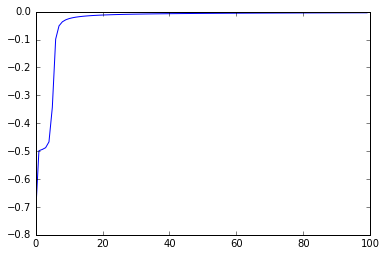

In [35]:
%pylab inline
pylab.plot(yx, lviewx[:,0])

In [34]:
# 三层隐藏层 网络
import numpy as np
 
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
 
    return 1/(1+np.exp(-x))
 
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
 
y = np.array([[0],
            [1],
            [1],
            [0]])
 
np.random.seed(1)
 
# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,6)) - 1
syn2 = 2*np.random.random((6,1)) - 1
 
print 'syn0.shape %d' , syn0.shape
print 'syn1.shape %d' , syn1.shape

print 'X.shape %d' , X.shape

lview = []
for j in xrange(10000):
 
    # Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    l3 = nonlin(np.dot(l2,syn2))
 
    # how much did we miss the target value?
    #l2_error = y - l2
    l3_error = y -  l3
 
    if (j% 500) == 0:
        #print "Error:" + str(np.mean(np.abs(l2_error)))
        print "Error:" + str(np.mean(np.abs(l3_error)))
        #print 'syn0',syn0
        #print 'syn1',syn1
        
    if(j%100) == 0:
        lview.append(l3_error)
 
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l3_delta = l3_error*nonlin(l3, deriv=True)
    
    l2_error = l3_delta.dot(syn2.T)
    
    l2_delta = l2_error*nonlin(l2,deriv=True)
 
    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
 
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)
 
    syn2 += l2.T.dot(l3_delta)
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    
print l2
print l3

syn0.shape %d (3, 4)
syn1.shape %d (4, 6)
X.shape %d (4, 3)
Error:0.500726417987
Error:0.412160293159
Error:0.0304544930762
Error:0.0190559237339
Error:0.0147441599666
Error:0.0123592517732
Error:0.0108060794243
Error:0.00969686927087
Error:0.00885617961493
Error:0.00819194309523
Error:0.00765073738374
Error:0.00719921871208
Error:0.00681538816119
Error:0.00648408362619
Error:0.00619447940897
Error:0.00593861727497
Error:0.00571050186659
Error:0.00550552131569
Error:0.00532006356439
Error:0.00515125490264
[[ 0.15942294  0.28773401  0.82115729  0.14037827  0.12895973  0.80746259]
 [ 0.3418398   0.49746304  0.38685176  0.58094544  0.81443627  0.34744373]
 [ 0.08686772  0.45622974  0.23009033  0.62721761  0.79123719  0.49917012]
 [ 0.16081151  0.20668204  0.84864399  0.28252224  0.14065346  0.77188553]]
[[ 0.00425333]
 [ 0.99495367]
 [ 0.99536591]
 [ 0.00605454]]


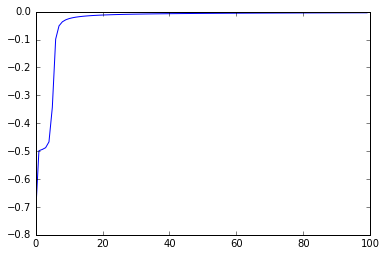

In [37]:
pylab.plot(yx, lviewx[:,0],label='lview(1)')